In [1]:
  #Mount Google drive 
  from google.colab import drive 
  drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from zipfile import ZipFile
file_name = "/content/drive/My Drive/Colab Notebooks/dataset.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("unzipping completed")

unzipping completed


In [0]:
!pip install -q keras 

In [4]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [0]:
train_paper_dir = os.path.join('/content/dataset/paper')
train_rock_dir = os.path.join('/content/dataset/rock')
train_scissors_dir = os.path.join('/content/dataset/scissors')

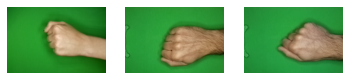

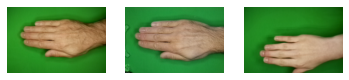

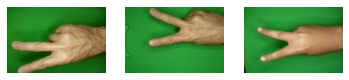

In [6]:
# visualizing the data
n = 3
for f in [train_rock_dir, train_paper_dir, train_scissors_dir]:
    for i in range(n):
        sp = plt.subplot(1, n, i + 1)
        sp.axis('Off')
        img = mpimg.imread(f + "/" + os.listdir(f)[i])
        plt.imshow(img)
    plt.show()

In [0]:
# model creation
CNN_Classifier=Sequential();
#covolution layer 
CNN_Classifier.add(Conv2D(16,(3,3), input_shape=(200, 300, 3),activation='relu'))
CNN_Classifier.add(MaxPooling2D(2,2))
CNN_Classifier.add(Conv2D(32, (3, 3), activation='relu', padding='same', name='conv_2'))
CNN_Classifier.add(MaxPooling2D((2, 2), name='maxpool_2'))
CNN_Classifier.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='conv_3'))
CNN_Classifier.add(MaxPooling2D((2, 2), name='maxpool_3'))
CNN_Classifier.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='conv_4'))
CNN_Classifier.add(MaxPooling2D((2, 2), name='maxpool_4'))
#Flattening
CNN_Classifier.add(Flatten())
#ADD DROP OUT LAYER 
#CNN_Classifier.add(Dropout(0.5))
#Full Connection 
#Hiddden layer with 128 neuron 
CNN_Classifier.add(Dense(units=128, activation='relu'))
#output layer with sigmoid 
CNN_Classifier.add(Dense(units=3, activation='softmax'))


In [8]:
CNN_Classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 298, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 149, 16)       0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 99, 149, 32)       4640      
_________________________________________________________________
maxpool_2 (MaxPooling2D)     (None, 49, 74, 32)        0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 49, 74, 64)        18496     
_________________________________________________________________
maxpool_3 (MaxPooling2D)     (None, 24, 37, 64)        0         
_________________________________________________________________
conv_4 (Conv2D)              (None, 24, 37, 64)       

In [0]:
CNN_Classifier.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
              )

In [10]:
#As we dont have separate training and test directory 
# we will create train and test for each class by using data generator 

data_path = '/content/dataset/'

# train/validation split using ImageDataGenerator
_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

train_generator = _datagen.flow_from_directory(
    data_path,
    target_size=(200, 300),
    batch_size=128,
    class_mode='categorical',
    subset='training'
)

validation_generator = _datagen.flow_from_directory(
    data_path,
    target_size=(200, 300),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


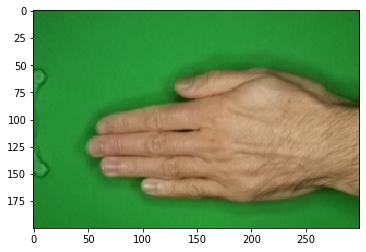

[1. 0. 0.]


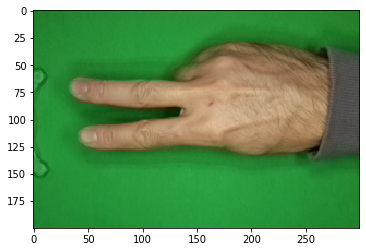

[0. 0. 1.]


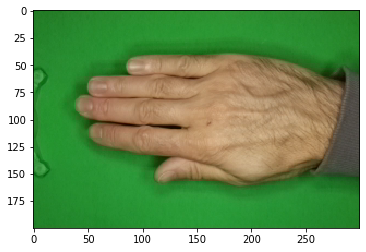

[1. 0. 0.]


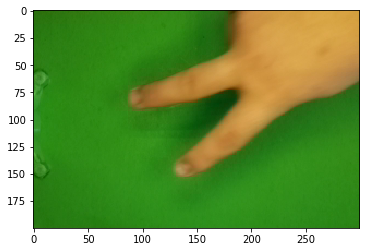

[0. 0. 1.]


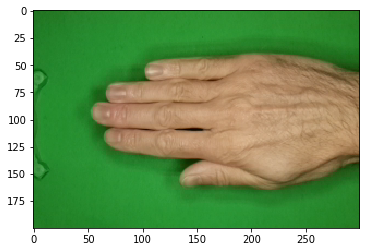

[1. 0. 0.]


In [11]:
# visualize data of each label
# the first 3 images with the corresponding labels
x, y = train_generator.next()
plt.imshow(x[0], interpolation='nearest')
plt.show()
print(y[0])

plt.imshow(x[1], interpolation='nearest')
plt.show()
print(y[1])

plt.imshow(x[2], interpolation='nearest')
plt.show()
print(y[2])

plt.imshow(x[3], interpolation='nearest')
plt.show()
print(y[3])

plt.imshow(x[4], interpolation='nearest')
plt.show()
print(y[4])



In [12]:
# # callbacks class definition
# class callBack(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs={}):
#         if (logs.get('loss') < 0.04):
#             print()
#             print("Reached almost 99% accuracy so cancelling training!")
#             self.model.stop_training = True


# callbacks = callBack()

# model training
history = CNN_Classifier.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples / train_generator.batch_size - 1,
    epochs=15,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples / validation_generator.batch_size - 1
    #,callbacks=[callbacks]
)

print(history.epoch, history.history['accuracy'][-1])

Epoch 1/15
13/12 [==============================] - 10s 766ms/step - loss: 1.0212 - accuracy: 0.4806 - val_loss: 0.6528 - val_accuracy: 0.8077
Epoch 2/15
13/12 [==============================] - 6s 458ms/step - loss: 0.5402 - accuracy: 0.8182 - val_loss: 0.3920 - val_accuracy: 0.8914
Epoch 3/15
13/12 [==============================] - 6s 443ms/step - loss: 0.3170 - accuracy: 0.8916 - val_loss: 0.2359 - val_accuracy: 0.9136
Epoch 4/15
13/12 [==============================] - 5s 418ms/step - loss: 0.1736 - accuracy: 0.9396 - val_loss: 0.1733 - val_accuracy: 0.9407
Epoch 5/15
13/12 [==============================] - 5s 405ms/step - loss: 0.1312 - accuracy: 0.9550 - val_loss: 0.0902 - val_accuracy: 0.9481
Epoch 6/15
13/12 [==============================] - 5s 416ms/step - loss: 0.0800 - accuracy: 0.9704 - val_loss: 0.0690 - val_accuracy: 0.9654
Epoch 7/15
13/12 [==============================] - 5s 416ms/step - loss: 0.0617 - accuracy: 0.9814 - val_loss: 0.1637 - val_accuracy: 0.9605
Epoch

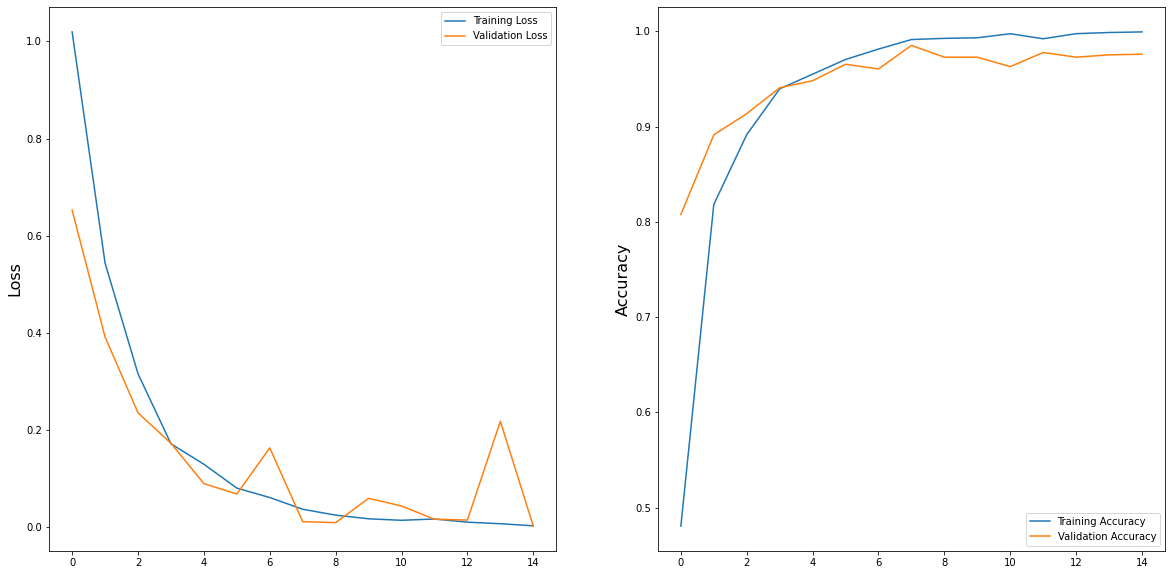

In [13]:
# Trainig Loss/Acc and Validation Loss/Acc visualization
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [0]:
#saving model in h5 file 
# save the model for later use
CNN_Classifier.save("/content/drive/My Drive/Colab Notebooks/rock-paper-scissors-model.h5")


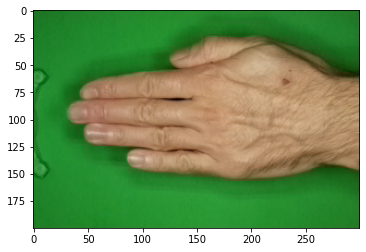

	 prediction is paper 


In [15]:
#do individual prediction 

import numpy as np
from keras.preprocessing import image
test_image= image.load_img('/content/drive/My Drive/Colab Notebooks/rps_individual_prediction/rps-2.png',target_size=(200,300))
plt.imshow(test_image)
plt.show()
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = CNN_Classifier.predict(test_image)
if result[0][1]== 1:
  print("\t prediction is rock ")
elif result[0][0] == 1:
  print("\t prediction is paper ")
else:
   print("\t prediction is scissor")




#Always remeber while training it will get label name from folder name which is arranged in alphabetical 



In [16]:
#getting prediction from saved h5 file 
#predicting output from model 
from tensorflow.python.keras.models import load_model 
# load model
loaded_model = load_model("/content/drive/My Drive/Colab Notebooks/rock-paper-scissors-model.h5")
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('/content/drive/My Drive/Colab Notebooks/rps_individual_prediction/rps-2.png',target_size=(200,300))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = loaded_model.predict(test_image)
if result[0][1]== 1:
  print("\t prediction is rock ")
elif result[0][0] == 1:
  print("\t prediction is paper ")
else:
   print("\t prediction is scissor")

	 prediction is paper 


In [0]:
# #getting prediction from live web cam 
#rockk paper scissor game 
#https://github.com/pavitrashah/Rock-Paper-Scissors-Image-Classifier-Using-Deep-Learning